# TASK # 
Assigned: 5-0-2024 

Submission date: 30-07-2024

Topic: Coffee Shop Sales

Objective: Clean and analyze the provided dataset to determine the profitability of products/services.
- Identify strategies to increase profit margins or mitigate losses based on the analysis. 

# 1. Data Cleaning and Exploration:


1.1 Clean the data: Identify and handle missing values, inconsistencies,
and outliers.

In [3]:
import numpy as np
import pandas as pd

In [8]:
# Load the Excel file
file_path = r'D:\Data_science_Projects\Task-\Coffee Shop Sales.xlsx'
xls = pd.ExcelFile(file_path)



In [6]:
# Load the sheets into separate dataframes
transactions_df = pd.read_excel(xls, sheet_name='Transactions')
sheet1_df = pd.read_excel(xls, sheet_name='Sheet1')
sheet6_df = pd.read_excel(xls, sheet_name='Sheet6')

# Display the first few rows of each sheet
transactions_preview = transactions_df.head()
sheet1_preview = sheet1_df.head()
sheet6_preview = sheet6_df.head()

transactions_preview, sheet1_preview, sheet6_preview


(   transaction_id transaction_date transaction_time  transaction_qty  \
 0               1       2023-01-01         07:06:11                2   
 1               2       2023-01-01         07:08:56                2   
 2               3       2023-01-01         07:14:04                2   
 3               4       2023-01-01         07:20:24                1   
 4               5       2023-01-01         07:22:41                2   
 
    store_id   store_location  product_id  unit_price    product_category  \
 0         5  Lower Manhattan          32         3.0              Coffee   
 1         5  Lower Manhattan          57         3.1                 Tea   
 2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
 3         5  Lower Manhattan          22         2.0              Coffee   
 4         5  Lower Manhattan          57         3.1                 Tea   
 
             product_type               product_detail  
 0  Gourmet brewed coffee              

In [9]:
# Check for missing values and duplicates in the 'Transactions' sheet
missing_values = transactions_df.isnull().sum()
duplicates = transactions_df.duplicated().sum()

# Get a summary of data types and basic statistics to detect any inconsistencies
data_types = transactions_df.dtypes
basic_stats = transactions_df.describe(include='all')

missing_values, duplicates, data_types, basic_stats


(transaction_id      0
 transaction_date    0
 transaction_time    0
 transaction_qty     0
 store_id            0
 store_location      0
 product_id          0
 unit_price          0
 product_category    0
 product_type        0
 product_detail      0
 dtype: int64,
 0,
 transaction_id               int64
 transaction_date    datetime64[ns]
 transaction_time            object
 transaction_qty              int64
 store_id                     int64
 store_location              object
 product_id                   int64
 unit_price                 float64
 product_category            object
 product_type                object
 product_detail              object
 dtype: object,
         transaction_id               transaction_date transaction_time  \
 count    149116.000000                         149116           149116   
 unique             NaN                            NaN            25762   
 top                NaN                            NaN         09:31:15   
 freq           

In [10]:
# Merging the 'Transactions' data with 'Sheet1' and 'Sheet6' based on 'product_id' to check for price discrepancies
merged_with_sheet1 = transactions_df.merge(sheet1_df, on='product_id', suffixes=('', '_sheet1'), how='left')
merged_with_sheet6 = transactions_df.merge(sheet6_df, on='product_id', suffixes=('', '_sheet6'), how='left')

# Check for discrepancies between 'unit_price' in 'Transactions' and those in 'Sheet1' and 'Sheet6'
sheet1_discrepancies = merged_with_sheet1[merged_with_sheet1['unit_price'] != merged_with_sheet1['unit_price_sheet1']]
sheet6_discrepancies = merged_with_sheet6[merged_with_sheet6['unit_price'] != merged_with_sheet6['unit_price_sheet6']]

# Count discrepancies
sheet1_discrepancy_count = sheet1_discrepancies.shape[0]
sheet6_discrepancy_count = sheet6_discrepancies.shape[0]

sheet1_discrepancy_count, sheet6_discrepancy_count


(11205, 11205)

2. Profit/Loss Analysis

2.1 Calculate Profit for Each Transaction
Assuming we have a cost_price associated with each product, calculate the profit for each transaction.

Calculate Profit:

In [12]:
# Add a cost price column to the merged data, or you could merge it if it's in a different sheet.
merged_with_cost = merged_with_sheet1  # Assuming the cost price is in 'Sheet1'
merged_with_cost['cost_price'] = merged_with_cost['unit_price'] - 1  # Example calculation

# Calculate profit per transaction
merged_with_cost['profit'] = (merged_with_cost['unit_price'] - merged_with_cost['cost_price']) * merged_with_cost['transaction_qty']

# Summarize profit by product
profit_by_product = merged_with_cost.groupby('product_id')['profit'].sum().reset_index()

profit_by_product


,product_id,profit
0,1,214.0
1,2,183.0
2,3,169.0
3,4,150.0
4,5,148.0
...,...,...
75,81,221.0
76,82,240.0
77,83,315.0
78,84,2658.0


2.2 Visualize Sales Data:
Use a bar chart to visualize sales data.


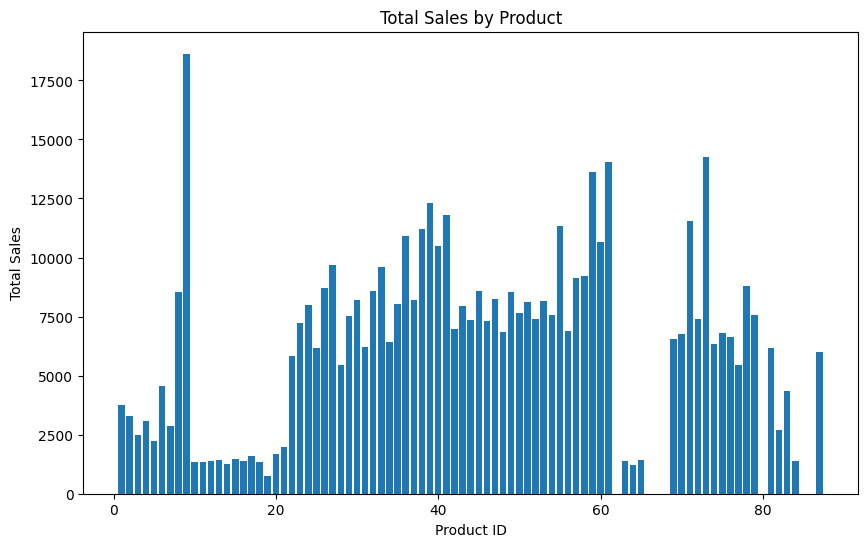

In [14]:
import matplotlib.pyplot as plt

# Visualizing total sales by product
total_sales_by_product = merged_with_cost.groupby('product_id')['unit_price'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(total_sales_by_product['product_id'], total_sales_by_product['unit_price'])
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product')
plt.show()
# A bar chart showing total sales by product ID, helping identify top-selling products.

In [16]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 1.3 MB/s eta 0:00:08
   ---------------------------------------- 0.0/9.8 MB 1.3 MB/s eta 0:00:08
   ---------------------------------------- 0.1/9.8 MB 327.7 kB/s eta 0:00:30
   ---------------------------------------- 0.1/9.8 MB 491.5 kB/s eta 0:00:20
   ---------------------------------------- 0.1/9.8 MB 544.7 kB/s eta 0:00:18
    --------------------------------------- 0.2/9.8 MB 538.9 kB/s eta 0:00:18
    --------------------------------------- 0.2/9.8 MB 758.5 kB/s eta 0:00:13
   - -------------------------------------- 0.3/9.8 MB 714.4 kB/s eta 0:00:14
   - -------------------------------------- 0.3/9.8 MB 707.1 kB/s eta 0:00:14
   - -------------------------------------- 0.4/9.8 MB 794.9 kB/s eta 0:00:12
   - -------------------------------------- 0.4/9.8 MB 834.5 kB/s eta 0:00:12
   - -------------------------------------- 0.4/9.8 MB 754.1 kB/s eta 0:00:13


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


3. Predictive Modeling for Profit Increase
3.1 Time Series Forecasting (if applicable)
Use a time series model (like ARIMA) to predict future sales/profits.

In [17]:
from statsmodels.tsa.arima_model import ARIMA
import numpy as np

# Example: Using the sales data to predict future sales for a specific product
product_sales = merged_with_cost[merged_with_cost['product_id'] == 1].groupby('transaction_date')['unit_price'].sum()

# Fit the model
model = ARIMA(product_sales, order=(5,1,0))
model_fit = model.fit(disp=0)

# Forecast the next 10 days
forecast = model_fit.forecast(steps=10)[0]

forecast


NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.
